# Plot Radar Cross-Sections
## This notebook demonstrates how to read the radar files from the IMPACTS DAAC and make basic time-height plots of the flight legs

### Begin by importing all the necessary libraries

In [2]:

import sys
sys.path.append("../../src")

import numpy as np
import matplotlib.pyplot as plt
from impacts_tools import er2

%matplotlib inline

In [3]:
exrad_filepath = '/Users/victoria/projects/data/IMPACTS/exrad/IMPACTS2020_EXRAD_L1B_RevC_20200207.h5'

hiwrap_filepath = '/Users/victoria/projects/data/IMPACTS/hiwrap/IMPACTS2020_HIWRAP_l1B_RevB_20200207.h5'

vad_filepath = '/Users/victoria/projects/data/IMPACTS/VAD/IMPACTS_EXRAD-VAD_L3_20200207T150806_to_20200207T152406_synthetic_multiscan_VAD_analysis_v01r02.nc'

In [5]:
# load the exrad data as an IMPACTS_tools Exrad data object
exrad = er2.Exrad(exrad_filepath)

# the Exrad object stores the instrument data as an XArray dataset in a 'data' property
exrad.data

<xarray.Dataset>
Dimensions:                (range: 886, time: 84780)
Coordinates:
  * range                  (range) float32 5.003e+03 5.022e+03 ... 2.159e+04
    height                 (range, time) float32 1.243e+04 ... -1.422e+04
  * time                   (time) datetime64[ns] 2020-02-07T12:22:26.500000 ....
    distance               (time) float32 58.62 117.2 ... 4.334e+06 4.334e+06
    lat                    (time) float32 33.33 33.33 33.33 ... 32.39 32.39
    lon                    (time) float32 -79.41 -79.41 -79.41 ... -80.54 -80.54
Data variables: (12/20)
    dbz                    (range, time) float32 nan -15.35 -15.53 ... nan nan
    vel                    (range, time) float32 nan nan nan nan ... nan nan nan
    width                  (range, time) float32 nan nan nan nan ... nan nan nan
    vel_horiz_offset       (range, time) float32 nan nan nan nan ... nan nan nan
    vel_nubf_offset        (range, time) float32 nan nan nan nan ... nan nan nan
    mask_copol             (range, time) int32 0 1 1 2 3 3 3 3 ... 0 0 0 0 0 0 0
    ...                     ...
    er2_drift              (time) float32 -0.1 -0.1 -0.05256 ... 2.8 2.9 3.0
    er2_EastVel            (time) float32 182.0 182.0 182.0 ... -45.23 -45.42
    er2_NorthVel           (time) float32 147.9 147.9 147.9 ... -26.45 -26.33
    er2_upVel              (time) float32 7.425 7.269 7.37 ... -12.42 -12.57
    er2_track              (time) float32 50.9 50.9 50.9 ... 239.5 239.7 239.9
    er2_motion             (time) float32 0.1638 0.3747 0.4368 ... 4.26 3.567
Attributes: (12/20)
    Experiment:                               IMPACTS2020
    Date:                                     20200207
    Aircraft:                                 NASA ER-2
    Radar Name:                               EXRAD
    Data Contact:                             Matthew L. Walker McLinden, NAS...
    Instrument PI:                            Gerry Heymsfield, NASA/GSFC
    ...                                       ...
    Radar Transmit Frequency (Hz):            [9.624e+09]
    Radar Transmit Wavelength (m):            [0.03117207]
    Range Gate Spacing (m):                   18.737305
    Nominal Antenna Pointing:                 Nadir
    PRI:                                      200 us / 250 us staggered
    vertical_resolution:                      110.0

### Note how the dataset has two dimension, range and time. Using the impacts_tools radar object adds additional coordinates so it's easier to make different types of figures.


### Each radar contains data for the entire flight. Usually, we're only interested in looking at subsets of the entire flight, such as flight legs that cross snowbands, and we want to ignore data where the aircraft is turning, travelling to the storm, or returning to base. We can load the radar object just for the times of interest:

In [6]:
start_time = np.datetime64('2020-02-07T15:08:00')
end_time = np.datetime64('2020-02-07T15:24:00')

In [7]:

exrad_leg1 = er2.Exrad(exrad_filepath, start_time=start_time, end_time=end_time)


In [8]:
exrad_leg1.data

<xarray.Dataset>
Dimensions:                (range: 886, time: 3841)
Coordinates:
  * range                  (range) float32 5.003e+03 5.022e+03 ... 2.159e+04
    height                 (range, time) float32 1.501e+04 ... -2.038e+03
  * time                   (time) datetime64[ns] 2020-02-07T15:08:00 ... 2020...
    distance               (time) float32 2.102e+06 2.102e+06 ... 2.327e+06
    lat                    (time) float32 43.13 43.13 43.13 ... 43.05 43.05
    lon                    (time) float32 -76.15 -76.15 -76.14 ... -73.39 -73.39
Data variables: (12/20)
    dbz                    (range, time) float32 nan nan nan ... 16.3 15.8 15.33
    vel                    (range, time) float32 nan nan nan nan ... nan nan nan
    width                  (range, time) float32 nan nan nan ... 6.287 6.103
    vel_horiz_offset       (range, time) float32 nan nan nan nan ... nan nan nan
    vel_nubf_offset        (range, time) float32 nan nan nan ... -2.815 -2.73
    mask_copol             (range, time) int32 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3
    ...                     ...
    er2_drift              (time) float32 0.9 0.9 0.9 0.8 ... -0.2 -0.2 -0.2
    er2_EastVel            (time) float32 233.2 233.2 233.2 ... 238.8 238.8
    er2_NorthVel           (time) float32 8.266 7.328 6.514 ... -14.19 -14.19
    er2_upVel              (time) float32 0.8362 0.8534 ... -0.3809 -0.3441
    er2_track              (time) float32 87.97 88.2 88.4 ... 93.4 93.4 93.4
    er2_motion             (time) float32 -4.495 -4.481 -4.471 ... -4.824 -4.852
Attributes: (12/20)
    Experiment:                               IMPACTS2020
    Date:                                     20200207
    Aircraft:                                 NASA ER-2
    Radar Name:                               EXRAD
    Data Contact:                             Matthew L. Walker McLinden, NAS...
    Instrument PI:                            Gerry Heymsfield, NASA/GSFC
    ...                                       ...
    Radar Transmit Frequency (Hz):            [9.624e+09]
    Radar Transmit Wavelength (m):            [0.03117207]
    Range Gate Spacing (m):                   18.737305
    Nominal Antenna Pointing:                 Nadir
    PRI:                                      200 us / 250 us staggered
    vertical_resolution:                      110.0

### Now we can plot the data for the selected flight leg by longitude and height

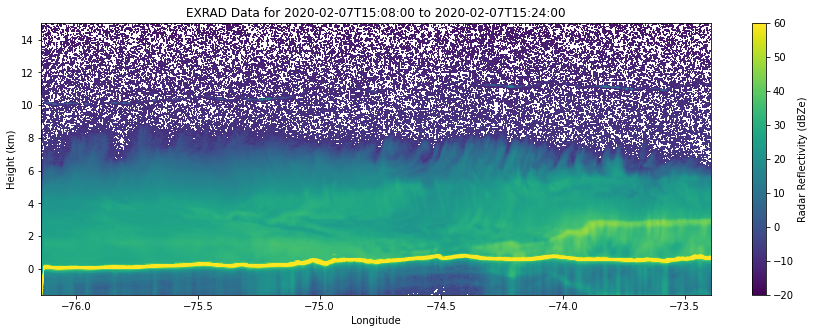

In [12]:
fig = plt.figure(figsize=(15,5))

plt.pcolormesh(exrad_leg1.data['lon'][:], exrad_leg1.data['height'][:,0]/1000, exrad_leg1.data['dbz'][:,:], vmin=-20, vmax=60, shading='nearest', rasterized=True)

cbar = plt.colorbar()
cbar.set_label('Radar Reflectivity (dBZe)')

plt.title('EXRAD Data for ' + str(start_time) + ' to ' + str(end_time))
plt.ylabel('Height (km)')
plt.xlabel('Longitude')
plt.show()

### Use the class method to despeckle the data

In [13]:
dbz_clean = exrad_leg1.despeckle(exrad_leg1.data['dbz'], sigma=1)

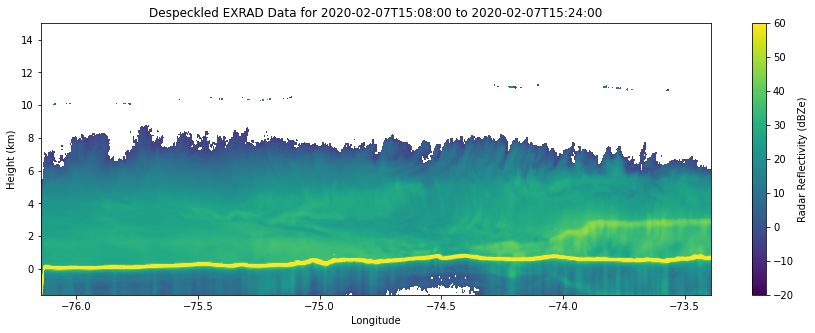

In [15]:
fig = plt.figure(figsize=(15,5))

plt.pcolormesh(exrad_leg1.data['lon'][:], exrad_leg1.data['height'][:,0]/1000, dbz_clean[:,:], vmin=-20, vmax=60,shading='nearest', rasterized=True)

cbar = plt.colorbar()
cbar.set_label('Radar Reflectivity (dBZe)')

plt.title('Despeckled EXRAD Data for ' + str(start_time) + ' to ' + str(end_time))
plt.ylabel('Height (km)')
plt.xlabel('Longitude')
plt.show()

### Now plot by time instead of longitude

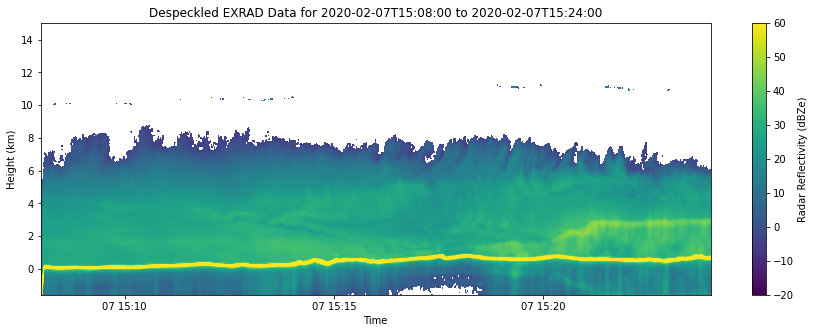

In [17]:
fig = plt.figure(figsize=(15,5))

plt.pcolormesh(exrad_leg1.data['time'][:], exrad_leg1.data['height'][:,0]/1000, dbz_clean[:,:], vmin=-20, vmax=60,shading='nearest', rasterized=True)

cbar = plt.colorbar()
cbar.set_label('Radar Reflectivity (dBZe)')

plt.title('Despeckled EXRAD Data for ' + str(start_time) + ' to ' + str(end_time))
plt.ylabel('Height (km)')
plt.xlabel('Time')

plt.show()

### Or by range gate instead of height, and distance along the flight track instead of time

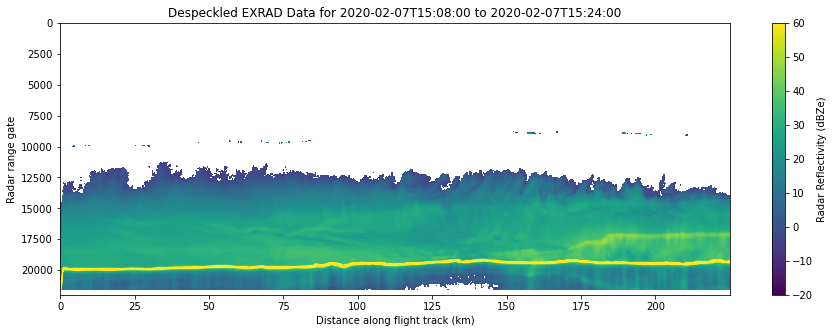

In [18]:
fig = plt.figure(figsize=(15,5))

plt.pcolormesh(exrad_leg1.data['distance'][:]/1000 - exrad_leg1.data['distance'][0]/1000, exrad_leg1.data['range'][:], dbz_clean[:,:], vmin=-20, vmax=60,shading='nearest', rasterized=True)

cbar = plt.colorbar()
cbar.set_label('Radar Reflectivity (dBZe)')

plt.title('Despeckled EXRAD Data for ' + str(start_time) + ' to ' + str(end_time))

plt.xlabel('Distance along flight track (km)')
plt.ylabel('Radar range gate')

# invert the y axis since range gate is from plane
plt.ylim(22000,0)
plt.show()

### Plot HIWRAP radar data exactly the same way

In [19]:
hiwrap_leg1 = er2.Hiwrap(hiwrap_filepath, start_time=start_time, end_time=end_time)

hiwrap_leg1.data

<xarray.Dataset>
Dimensions:                   (range: 609, time: 1921)
Coordinates:
  * range                     (range) float32 5.014e+03 5.04e+03 ... 2.097e+04
    height                    (range, time) float32 1.5e+04 ... -1.426e+03
  * time                      (time) datetime64[ns] 2020-02-07T15:08:00 ... 2...
    distance                  (time) float32 2.103e+06 2.103e+06 ... 2.328e+06
    lat                       (time) float32 43.13 43.13 43.13 ... 43.05 43.05
    lon                       (time) float32 -76.15 -76.14 ... -73.4 -73.39
Data variables: (12/28)
    dbz_ka                    (range, time) float32 nan nan nan ... nan nan nan
    dbz_ku                    (range, time) float32 nan nan nan ... 10.36 10.37
    vel_ka                    (range, time) float32 nan nan nan ... nan nan nan
    vel_ku                    (range, time) float32 nan nan nan ... nan nan nan
    width_ka                  (range, time) float32 nan nan nan ... nan nan nan
    width_ku                  (range, time) float32 nan nan nan ... 4.287 4.766
    ...                        ...
    er2_drift                 (time) float32 0.9 0.9 0.8 0.8 ... -0.2 -0.2 -0.2
    er2_EastVel               (time) float32 233.2 233.2 233.4 ... 238.8 238.8
    er2_NorthVel              (time) float32 8.21 6.487 4.517 ... -14.19 -14.19
    er2_upVel                 (time) float32 0.8369 0.8653 ... -0.451 -0.3423
    er2_track                 (time) float32 87.98 88.41 88.89 ... 93.4 93.4
    er2_motion                (time) float32 -1.067 -1.025 ... -1.026 -1.103
Attributes: (12/24)
    Experiment:                                       IMPACTS2020_Ku
    Date:                                             20200207
    Aircraft:                                         NASA ER-2
    Radar Name:                                       HIWRAP
    Data Contact:                                     Matthew L. Walker McLin...
    Instrument PI:                                    Lihua Li, NASA/GSFC
    ...                                               ...
    Radar Transmit Ka-Band Wavelength (m):            [0.00843645]
    Radar Transmit Ku-Band Wavelength (m):            [0.02156722]
    Range Gate Spacing (m):                           26.25
    Nominal Antenna Pointing:                         Nadir
    PRI:                                              224 us / 280 us staggered
    Bands:                                            Ka, Ku

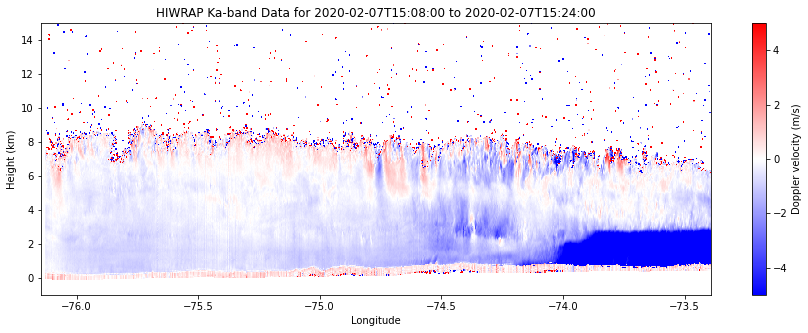

In [23]:
fig = plt.figure(figsize=(15,5))

plt.pcolormesh(hiwrap_leg1.data['lon'][:], hiwrap_leg1.data['height'][:,0]/1000, hiwrap_leg1.data['vel_ka'][:,:], cmap='bwr', vmin=-5, vmax=5, shading='nearest', rasterized=True)

cbar = plt.colorbar()
cbar.set_label('Doppler velocity (m/s)')

plt.title('HIWRAP Ka-band Data for ' + str(start_time) + ' to ' + str(end_time))
plt.xlabel('Longitude')
plt.ylabel('Height (km)')
plt.show()

### Despeckle the HIWRAP velocity

In [22]:
vel_clean = hiwrap_leg1.despeckle(hiwrap_leg1.data['vel_ka'], sigma=1)

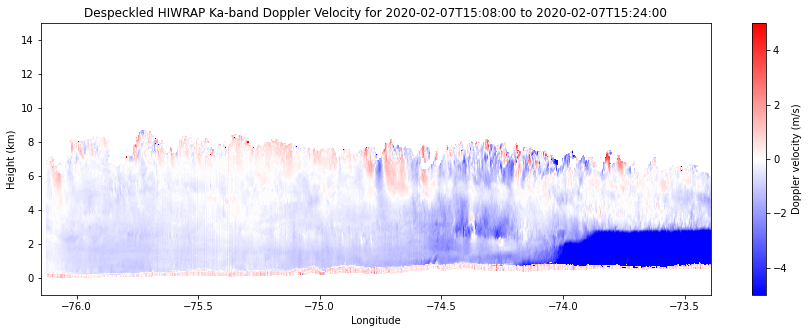

In [24]:
fig = plt.figure(figsize=(15,5))

#help(plt.pcolormesh)
plt.pcolormesh(hiwrap_leg1.data['lon'][:], hiwrap_leg1.data['height'][:,0]/1000, vel_clean[:,:], cmap='bwr', vmin=-5, vmax=5, shading='nearest', rasterized=True)

cbar = plt.colorbar()
cbar.set_label('Doppler velocity (m/s)')

plt.title('Despeckled HIWRAP Ka-band Doppler Velocity for ' + str(start_time) + ' to ' + str(end_time))

plt.xlabel('Longitude')
plt.ylabel('Height (km)')
plt.show()